# Credit Card Customer Clustering with K-means and Hierarchical Clustering

Link to Kaggle dataset: https://www.kaggle.com/datasets/arjunbhasin2013/ccdata

<table>
  <tr>
    <th style="text-align: left; background: lightgrey">Column Name</th>
    <th style="text-align: left; background: lightgrey">Column Contents</th>
  </tr>
  <tr>
    <td style="text-align: left"> <code>CUST_ID</code> </td>
    <td style="text-align: left">Identification of credit card holder</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>BALANCE</code></td>
    <td style="text-align: left">Balance amount left in their account to make purchases</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>BALANCE_FREQUENCY</code></td>
    <td style="text-align: left">How frequently the balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>PURCHASES</code></td>
    <td style="text-align: left">Amount of purchases made from account</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>ONEOFF_PURCHASES</code></td>
    <td style="text-align: left">Maximum purchase amount done in one-go</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>INSTALLMENTS_PURCHASES</code></td>
    <td style="text-align: left">Amount of purchase done in installment</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>CASH_ADVANCE</code></td>
    <td style="text-align: left">Cash in advance given by the user</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>PURCHASES_FREQUENCY</code></td>
    <td style="text-align: left">How frequently the purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>ONEOFF_PURCHASES_FREQUENCY</code></td>
    <td style="text-align: left">How frequently purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>PURCHASES_INSTALLMENTS_FREQUENCY</code></td>
    <td style="text-align: left">How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>CASH_ADVANCE_FREQUENCY</code></td>
    <td style="text-align: left">How frequently the cash in advance being paid</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>CASH_ADVANCE_TRX</code></td>
    <td style="text-align: left">Number of transactions made with "Cash in Advanced" </td>
  </tr>
  <tr>
    <td style="text-align: left"><code>PURCHASES_TRX</code></td>
    <td style="text-align: left">Number of purchase transactions made</td>
  </tr>
  <tr>
    <td style="text-align: left"><code>CREDIT_LIMIT</code></td>
    <td style="text-align: left">Limit of credit card for user </td>
  </tr>
  <tr>
    <td style="text-align: left"><code>PAYMENTS</code></td>
    <td style="text-align: left">Amount of payment done by user </td>
  </tr>
  <tr>
    <td style="text-align: left"><code>MINIMUM_PAYMENTS</code></td>
    <td style="text-align: left">Minimum amount of payments made by user </td>
  </tr>
  <tr>
    <td style="text-align: left"><code>PRC_FULL_PAYMENT</code></td>
    <td style="text-align: left">Percent of full payment paid by user </td>
  </tr>
  <tr>
    <td style="text-align: left"><code>TENURE</code></td>
    <td style="text-align: left">Tenure of credit card service for user</td>
  </tr>
</table>


In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('CC_GENERAL.csv',index_col='CUST_ID')
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Pre-analysis
* Explore the features and identify the key features
* Potential labelling
    * people who use credit often vs people who don't
    * good financial health vs bad financial health
* Business purpose
    * differentiate the customers to provide customerized services and protect the bank from bad customers.

# Data Cleaning and EDA

In [2]:
# check dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CRED

The dataset has 8950 rows and 17 features. All numeric.

In [3]:
# check missing values
df.isna().mean().mul(100)

BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.011173
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    3.497207
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

* 0.01% missing values in "CREDIT_LIMIT". I'll drop the missing value since it's very small.

* 3.49% missing values in "MINIMUM_PAYMENTS". MINIMUM_PAYMENTS" means Minimum amount of payments made by user. If a customer never made any payment, it makes sense that the Minimum amount shows "nan". I'll verify if that is the case in our dataset

In [4]:
df[df.MINIMUM_PAYMENTS.isna()].PAYMENTS.describe()

count      313.000000
mean       322.286168
std       1996.658905
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      29272.486070
Name: PAYMENTS, dtype: float64

seems like majority of the missing "MINIMUM_PAYMENTS" cases have 0 as its payment.I will further investigate in the non-zero payment cases

In [5]:
# cheching the pct of MINIMUM_PAYMENTS" cases have 0 as its payment
len(df[(df.MINIMUM_PAYMENTS.isna()) & (df.PAYMENTS==0)])/len(df[(df.MINIMUM_PAYMENTS.isna())])*100

76.6773162939297

76.68% MINIMUM_PAYMENTS" cases have 0 as its payment

In [6]:
len(df[(df.MINIMUM_PAYMENTS.isna()) & (df.PAYMENTS!=0)].PAYMENTS)

73

I decided to drop the above 73 missing values and impute the rest missing values with 0

In [7]:
df.drop(df[(df.MINIMUM_PAYMENTS.isna()) & (df.PAYMENTS!=0)].PAYMENTS.index,inplace=True)

In [8]:
df.MINIMUM_PAYMENTS.fillna(0,inplace=True)

In [9]:
df.dropna(inplace=True)

In [10]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

No missing value in the dataset anymore

In [11]:
# check duplicates
df.duplicated().sum()

0

There is no duplicates in our dataset

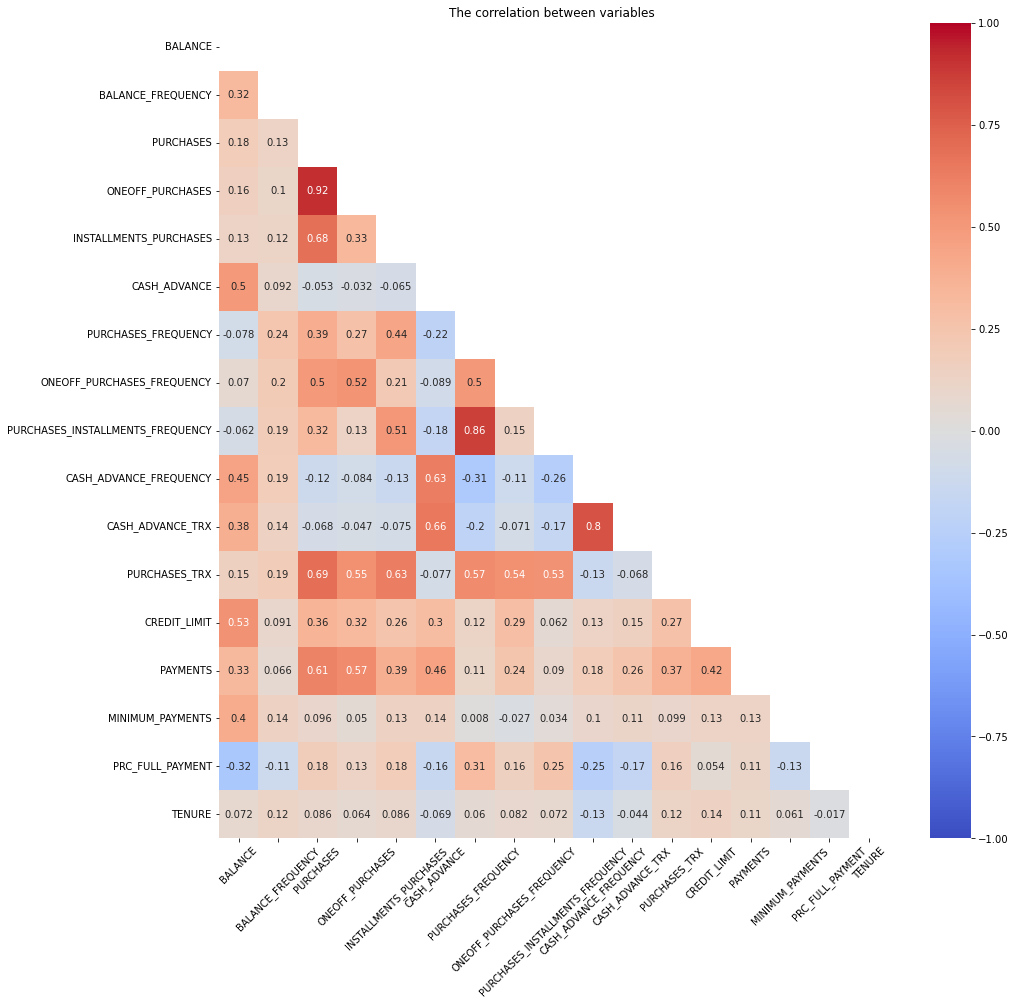

In [12]:
# get a sense on correlation between variables
plt.figure(figsize=(15,15))
mask= np.triu(df.corr())
sns.heatmap(df.corr(),mask=mask,cmap='coolwarm',vmin=-1.0,vmax=1.0,annot=True)
plt.title('The correlation between variables ')
plt.xticks(rotation=45)
plt.show()

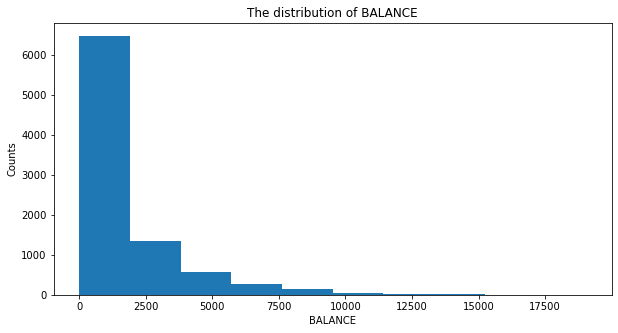

**************************************************


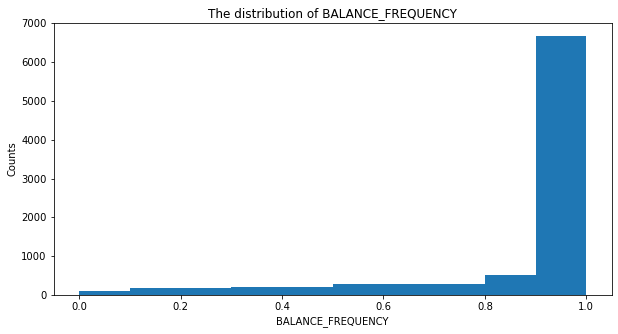

**************************************************


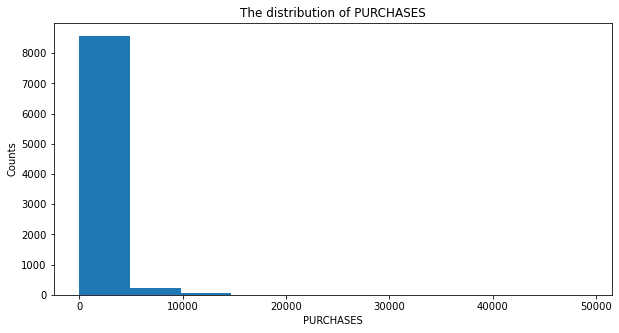

**************************************************


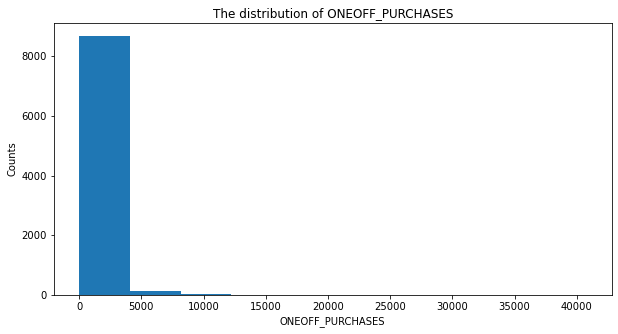

**************************************************


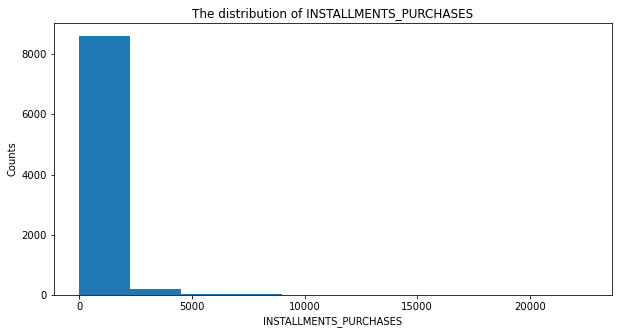

**************************************************


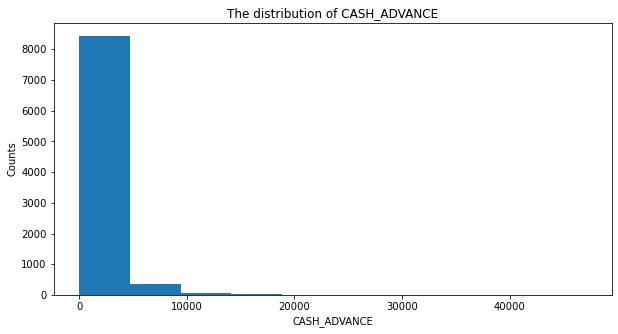

**************************************************


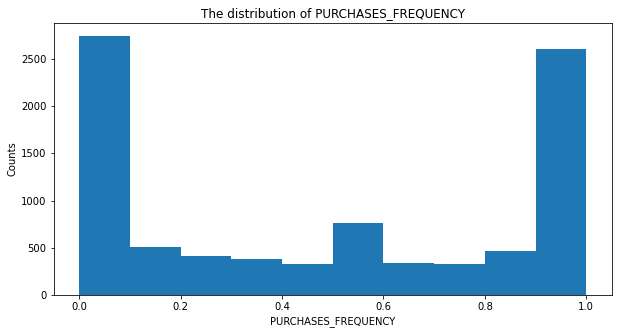

**************************************************


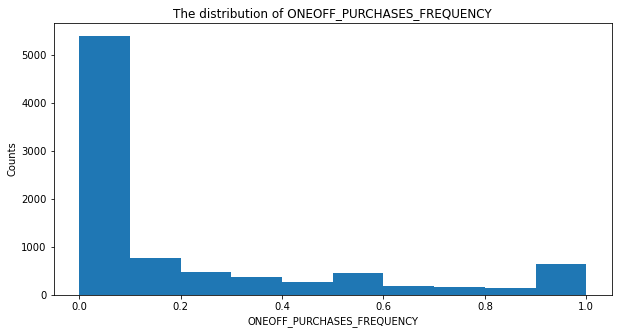

**************************************************


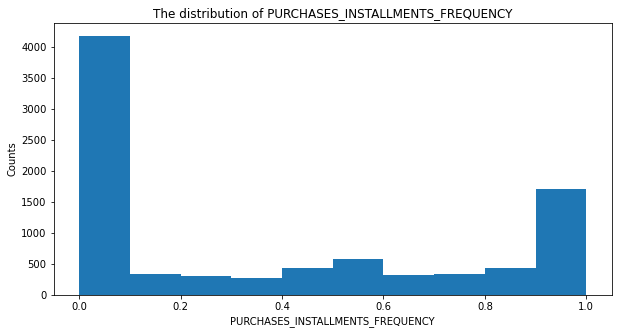

**************************************************


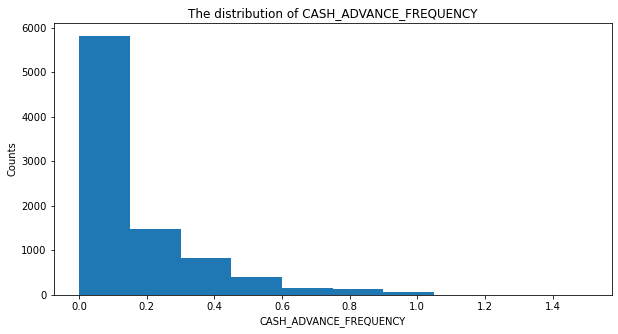

**************************************************


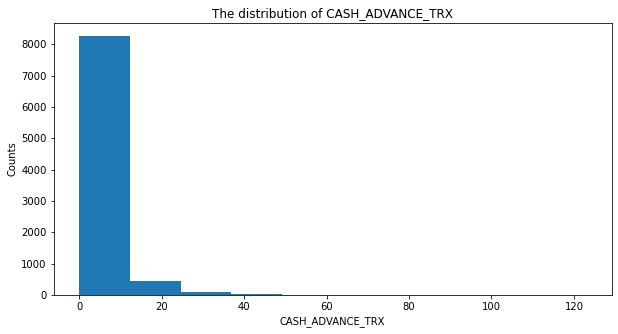

**************************************************


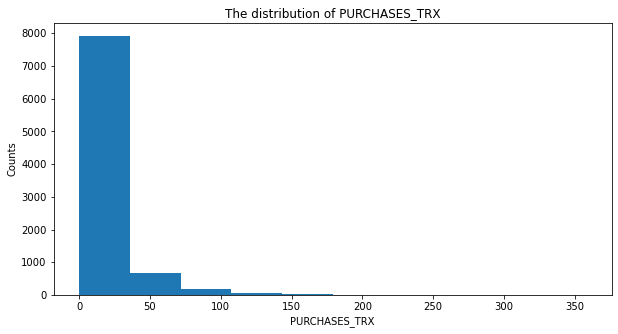

**************************************************


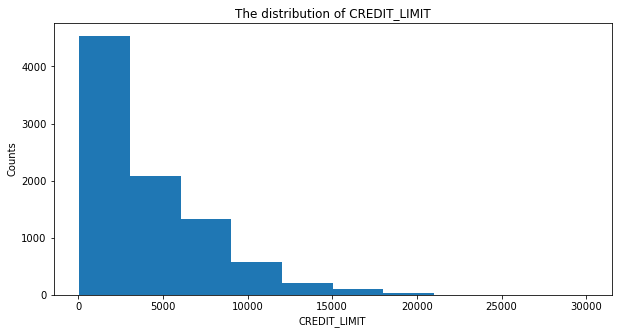

**************************************************


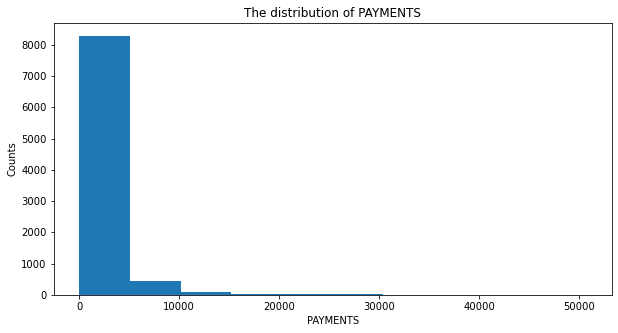

**************************************************


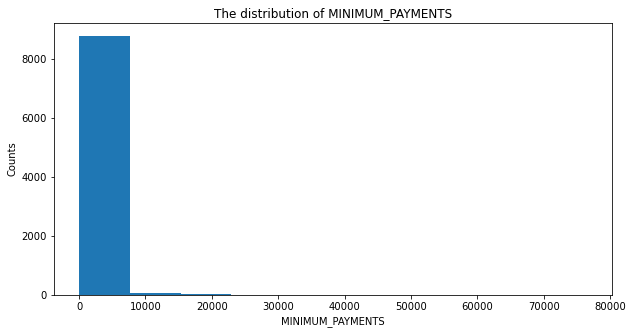

**************************************************


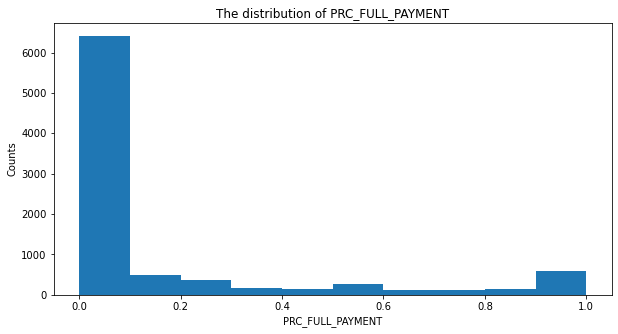

**************************************************


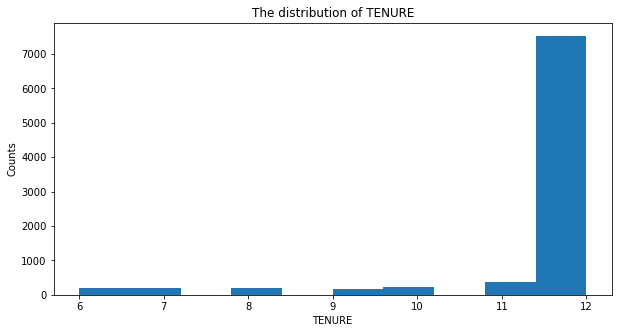

**************************************************


In [13]:
# Explore the distribution of data
for item in df.columns:
    plt.figure(figsize=(10,5))
    plt.hist(df[item])
    plt.xlabel(f'{item}')
    plt.ylabel('Counts')
    plt.title(f'The distribution of {item}')
    plt.show()
    print('*'*50)

In [14]:
ori_df = df.copy()

Most features are extremely skewed. Let's assume that any column with mean 25% greater than median is right skewed

In [15]:
right_skewed = [col for col in df.columns if df[col].mean() > 1.25*df[col].median()]

In [16]:
len(right_skewed)

14

In [17]:
not_right_skewed = [col for col in df.columns if col not in right_skewed]

In [18]:
len(not_right_skewed)

3

Use log to transform right skewed columns

In [19]:
for item in right_skewed:
    df[item]=np.log(df[item]+1)

There are three features that are not right skewed

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
df_scaled  = MinMaxScaler().fit_transform(df)

In [22]:
df_scaled = pd.DataFrame(df_scaled, columns = df.columns,index=df.index)

In [23]:
df_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,0.379045,0.818182,0.422994,0.000000,0.455879,0.000000,0.166667,0.000000,0.115477,0.000000,0.000000,0.186733,0.466811,0.490324,0.439821,0.000000,1.0
C10002,0.819116,0.909091,0.000000,0.000000,0.000000,0.815075,0.000000,0.000000,0.000000,0.243529,0.333889,0.000000,0.771814,0.767919,0.620654,0.289506,1.0
C10003,0.793799,1.000000,0.615884,0.626611,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.435970,0.782631,0.593925,0.573025,0.000000,1.0
C10004,0.752871,0.636364,0.677125,0.688918,0.000000,0.495472,0.083333,0.115477,0.000000,0.087355,0.143798,0.117816,0.782631,0.000000,0.000000,0.000000,1.0
C10005,0.680676,1.000000,0.262325,0.266894,0.000000,0.000000,0.083333,0.115477,0.000000,0.000000,0.000000,0.117816,0.495375,0.601905,0.489556,0.000000,1.0


# Modeling

I'm planning to build the following model
* K-means
* Density Based Clustering (DBSCAN)
* Hierarchical Clustering

Firstly I would like visualize the data 

In [24]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components =2)
tsne_data = tsne.fit_transform(df_scaled.sample(frac = .2))

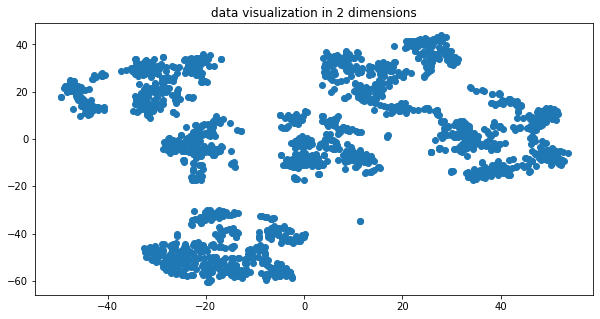

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_data[:,0],tsne_data[:,1])
plt.title('data visualization in 2 dimensions')
plt.show()


Seems like the data is seperable

# K means

In [26]:
from sklearn.cluster import KMeans
ks = range(1,10)
inertia_list = []
for k in ks:
    k_means_model = KMeans(n_clusters=k)
    k_means_model.fit(df_scaled)
    inertia_list.append(k_means_model.inertia_)    


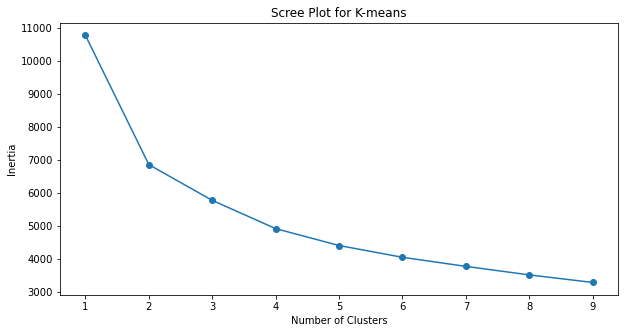

In [27]:
plt.figure(figsize=(10,5))
plt.plot(ks, inertia_list, marker="o")
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Scree Plot for K-means')
plt.xticks(ks)
plt.show()

Based on the elbow method, seems like the optimal K value is 6

In [28]:
k_means_model = KMeans(n_clusters=2)
k_means_model.fit(df_scaled)
kmean_label = k_means_model.labels_

# Hierarchical Clustering

In [29]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
ks = range(2,10)

sil_scores = []

for k in ks:
    
    agglom = AgglomerativeClustering(n_clusters = k,linkage = 'ward')
    
    agglom.fit(df_scaled)
    
    sil_scores.append(silhouette_score(df_scaled,agglom.labels_))

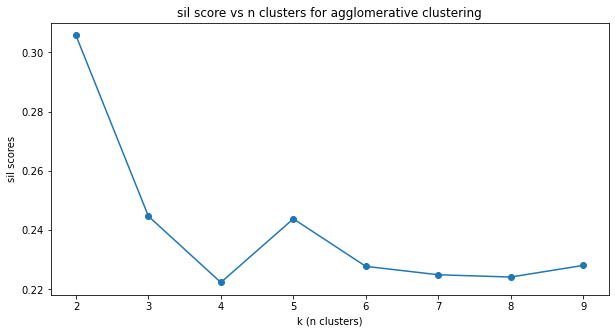

In [30]:
plt.figure(figsize = (10,5))
plt.plot(ks,sil_scores,marker = 'o')
plt.title('sil score vs n clusters for agglomerative clustering')
plt.xlabel('k (n clusters)')
plt.ylabel('sil scores')
plt.show()

In [31]:
agglom = AgglomerativeClustering(n_clusters = 2,linkage = 'ward')
    
agglom.fit(df_scaled)
agglom_label = agglom.labels_

The optimal K also appears to be 2 which is in line with K-mean model.

# Interpret the clusters

In [32]:
tsne = TSNE(n_components = 2)
tsne_data = tsne.fit_transform(df_scaled)

In [33]:
tsne_data_df = pd.DataFrame(tsne_data)
tsne_data_df['kmeans'] = k_means_model.labels_
tsne_data_df['agglom'] = agglom.labels_

In [34]:
tsne_data_df.head()

,0,1,kmeans,agglom
0,14.604195,-57.592247,0,0
1,21.024284,59.417347,0,1
2,42.858620,14.101979,1,0
3,73.039650,-28.046152,0,1
4,81.265778,16.713999,0,1


In [35]:
# convert the assigned label for kmeans to make it comparable to agglom in the scatterplot below
tsne_data_df['kmeans'] = np.where(tsne_data_df['kmeans'] == 0,1,0)

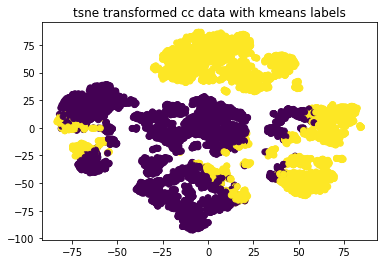

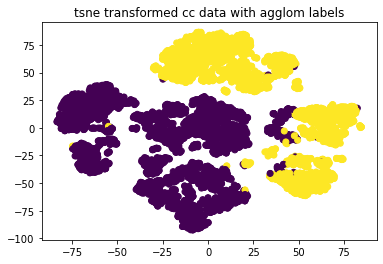

In [36]:
for algo in ['kmeans','agglom']:
    
    plt.figure()
    plt.scatter(tsne_data_df[0],tsne_data_df[1],c = tsne_data_df[algo])
    plt.title(f"tsne transformed cc data with {algo} labels")
    plt.show()

In [37]:
(pd.crosstab(tsne_data_df['kmeans'],tsne_data_df['agglom'])/tsne_data_df.shape[0])*100

agglom,0,1
kmeans,,
0,51.937810,1.532222
1,6.782334,39.747634


the kmeans and agglom agree about 90%(50.9%+39.7%) of the time 

In [38]:
ori_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C19185,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,0.000000,0.000000,6
C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6


In [39]:
# assign label to original df
ori_df['kmeans'] = k_means_model.labels_
ori_df['agglom'] = agglom.labels_

In [40]:
ori_df['kmeans'] = np.where(ori_df['kmeans'] == 0,1,0)

In [41]:
ori_df.drop(columns = 'agglom').groupby('kmeans').mean().T

kmeans,0,1
BALANCE,1358.000630,1829.688636
BALANCE_FREQUENCY,0.919707,0.841791
PURCHASES,1686.619888,230.079327
ONEOFF_PURCHASES,931.810257,210.548557
INSTALLMENTS_PURCHASES,755.255603,19.668797
CASH_ADVANCE,523.418482,1519.168186
PURCHASES_FREQUENCY,0.822510,0.108498
ONEOFF_PURCHASES_FREQUENCY,0.311279,0.080260
PURCHASES_INSTALLMENTS_FREQUENCY,0.657236,0.026477
CASH_ADVANCE_FREQUENCY,0.071587,0.210333


### Customer Characteristics
* Group 1 seems to have more riskier behavior and habits
* Group 1 seems less likely to a make full-payment
* group 1 has lower credit limit
* group 1 takes more cash and bigger cash advance.

I think we can label these two groups as "risky" and "normal" for group 1 and group 0 respectively

In [43]:
ori_df.drop(columns = 'kmeans').groupby('agglom').mean().T

agglom,0,1
BALANCE,1356.458170,1891.873656
BALANCE_FREQUENCY,0.901333,0.858017
PURCHASES,1527.183607,271.627907
ONEOFF_PURCHASES,825.241710,270.408633
INSTALLMENTS_PURCHASES,702.419839,1.272658
CASH_ADVANCE,582.779892,1561.370067
PURCHASES_FREQUENCY,0.759115,0.107867
ONEOFF_PURCHASES_FREQUENCY,0.272699,0.105757
PURCHASES_INSTALLMENTS_FREQUENCY,0.617984,0.002090
CASH_ADVANCE_FREQUENCY,0.079979,0.216042


Just wanted to confirm if agglom tells the same story and it does